In [2]:
import pandas as pd
import numpy as np

In [211]:
from sklearn.linear_model import LinearRegression

In [3]:
import parse

In [4]:
data=parse.aggergateData("../results")

[parser] Cannot find file ../results/confidence.c/01/dimovski/stderr.log
[parser] Cannot find file ../results/confidence.c/02/dimovski/stderr.log
[parser] Cannot find file ../results/confidence.c/03/dimovski/stderr.log
[parser] Cannot find file ../results/confidence.c/04/dimovski/stderr.log
[parser] Cannot find file ../results/confidence.c/05/dimovski/stderr.log
[parser] Cannot find file ../results/rangesum03.c/01/dimovski/stderr.log
[parser] Cannot find file ../results/rangesum03.c/02/dimovski/stderr.log
[parser] Cannot find file ../results/rangesum03.c/03/dimovski/stderr.log
[parser] Cannot find file ../results/rangesum03.c/04/dimovski/stderr.log
[parser] Cannot find file ../results/rangesum03.c/05/dimovski/stderr.log
[parser] Cannot find file ../results/rangesum07.c/01/dimovski/stderr.log
[parser] Cannot find file ../results/rangesum07.c/02/dimovski/stderr.log
[parser] Cannot find file ../results/rangesum07.c/03/dimovski/stderr.log
[parser] Cannot find file ../results/rangesum07.c/0

In [184]:
data

{'bwd_loop2-2.c': {'counterSharp': <parse.SingleBenchmarkToolRun at 0x7f90f8c073d0>,
  'dimovski': <parse.SingleBenchmarkToolRun at 0x7f90bb711220>,
  'approxmc': <parse.MultiBenchmarkToolRun at 0x7f90f8c07460>,
  'ganak': <parse.MultiBenchmarkToolRun at 0x7f90f8c07340>},
 'for_bounded_loop1-2.c': {'counterSharp': <parse.SingleBenchmarkToolRun at 0x7f90f8c07280>,
  'dimovski': <parse.SingleBenchmarkToolRun at 0x7f90bb718df0>,
  'approxmc': <parse.MultiBenchmarkToolRun at 0x7f90bb718880>,
  'ganak': <parse.MultiBenchmarkToolRun at 0x7f90bb718ac0>},
 'Log.c': {'counterSharp': <parse.SingleBenchmarkToolRun at 0x7f90bb718e80>,
  'dimovski': <parse.SingleBenchmarkToolRun at 0x7f90bb718ee0>,
  'approxmc': <parse.MultiBenchmarkToolRun at 0x7f90bb718e20>,
  'ganak': <parse.MultiBenchmarkToolRun at 0x7f90bb718d30>},
 'confidence.c': {'counterSharp': <parse.SingleBenchmarkToolRun at 0x7f90bb718af0>,
  'dimovski': <parse.SingleBenchmarkToolRun at 0x7f90bb718910>,
  'approxmc': <parse.MultiBenchma

In [5]:
unwind_size = {"usqrt-broken.c":33,
"usqrt.c":33,
"rangesum03.c":4,
"rangesum05.c":6,
"Problem10_16.c":1,
"rangesum07.c":8,
"Problem13_4.c":1,
"nondet.c":1,
"confidence.c":10,
"floor.c":2,
"floor-broken.c":2,
"bwd_loop1a.c":101,
"bwd_loop1a-2.c":101,
"bwd_loop2.c":101,
"bwd_loop2-2.c":101,
"bwd_loop7.c":101,
"bwd_loop7-2.c":101,
"bwd_loop10.c":32768,
"bwd_loop10-2.c":32768,
"count_up_down_true-unreach-call_true-termination.c":5,
"count_up_down_true-unreach-call_true-termination-2.c":500,
"example1a.c":102,
"example1a-2.c":102,
"example7a.c":11,
"example7a-2.c":1001,
"example7b.c":11,
"example7b-2.c":1001,
"for_bounded_loop1.c":11,
"for_bounded_loop1-2.c":1001,
"gsv2008.c":18,
"gsv2008-2.c":101,
"hhk2008.c":6,
"hhk2008-2.c":501,
"Log.c":5,
"Log-2.c":500,
"Mono3_1.c":1000000,
"Mono3_1-2.c":1000000,
"Waldkirch.c":6,
"Waldkirch-2.c":501,
"overflow.c":1,
}

In [6]:
counts = {}
for k, run in data.items():
    counts[k] = {}
    for t in ["AMM","AMH","ASM","ASH"]:
        if len(run["ganak"].res[t])>0:
            counts[k][t]=int(run["ganak"].res[t][0])
        elif len(run["approxmc"].res[t])>0:
            OK, MO, TO, T = run["approxmc"].getMedian(run["approxmc"].res[t],run["approxmc"].status[t])
            if OK:
                counts[k][t]= np.float64(T)
            else:
                counts[k][t]=None
        else:
            counts[k][t]=None

In [266]:
# 2: ++, --, +, -, assignments
# 3: %,*,/, <<, >>
# 4: Pointers
program_category = {
"usqrt-broken.c":(3,57),
"usqrt.c":(3,57),
"rangesum03.c":(4,80),
"rangesum05.c":(4,80),
"Problem10_16.c":(2,1378),
"rangesum07.c":(4,80),
"Problem13_4.c":(2,114326),
"nondet.c":(3,18),
"confidence.c":(3,15),
"floor.c":(4,46),
"floor-broken.c":(4,46),
"bwd_loop1a.c":(2,9),
"bwd_loop1a-2.c":(2,9),
"bwd_loop2.c":(2,10),
"bwd_loop2-2.c":(2,10),
"bwd_loop7.c":(3,13),
"bwd_loop7-2.c":(3,13),
"bwd_loop10.c":(2,13),
"bwd_loop10-2.c":(2,13),
"count_up_down_true-unreach-call_true-termination.c":(2,11),
"count_up_down_true-unreach-call_true-termination-2.c":(2,11),
"example1a.c":(2,8),
"example1a-2.c":(2,8),
"example7a.c":(2,8),
"example7a-2.c":(2,8),
"example7b.c":(3,10),
"example7b-2.c":(3,10),
"for_bounded_loop1.c":(2,12),
"for_bounded_loop1-2.c":(2,12),
"gsv2008.c":(2,12),
"gsv2008-2.c":(2,12),
"hhk2008.c":(2,12),
"hhk2008-2.c":(2,12),
"Log.c":(2,20),
"Log-2.c":(2,20),
"Mono3_1.c":(2,13),
"Mono3_1-2.c":(2,13),
"Waldkirch.c":(2,8),
"Waldkirch-2.c":(2,8),
"overflow.c":(2,11),
}

In [267]:
# benchmark, type, counter("ganak"/"approxmc"), unwind, count, var_num, clause_num, sample_size, cat,loc, status, median(time)
datapoints = []
for k, run in data.items():
    for t in ["AMM","AMH","ASM","ASH"]:
        if counts[k][t]==0:
            continue
        for counter in ["ganak","approxmc"]:
            if len(run[counter].var_num[t])==0: # File seems not to exist
                continue
            OK, MO, TO, T = run[counter].getMedian(run[counter].time[t],run[counter].status[t])
            if OK:
                status = "ok"
            elif MO:
                status = "mo"
                T=300
            elif TO:
                status = "to"
                T=300
            else:
                status = "?"
                T=300
            print(k,"-",t,":",status,",",counts[k][t])
            datapoints.append([
                k,
                t,
                counter,
                unwind_size[k],
                np.float64(counts[k][t] if counts[k][t] != None else -1),
                np.int64(run[counter].var_num[t][0]),
                np.int64(run[counter].clause_num[t][0]),
                np.int64(run[counter].sampling_size[t][0]),
                program_category[k][0],
                program_category[k][1],
                status,
                T
            ])

bwd_loop2-2.c - AMM : ok , 4294966296
bwd_loop2-2.c - AMM : ok , 4294966296
bwd_loop2-2.c - AMH : ok , 1000
bwd_loop2-2.c - AMH : ok , 1000
bwd_loop2-2.c - ASM : ok , 994
bwd_loop2-2.c - ASM : ok , 994
bwd_loop2-2.c - ASH : ok , 6
bwd_loop2-2.c - ASH : ok , 6
for_bounded_loop1-2.c - AMM : mo , 4294967296.0
for_bounded_loop1-2.c - AMM : ok , 4294967296.0
for_bounded_loop1-2.c - AMH : mo , 1024.0
for_bounded_loop1-2.c - AMH : ok , 1024.0
for_bounded_loop1-2.c - ASM : mo , 1008.0
for_bounded_loop1-2.c - ASM : ok , 1008.0
for_bounded_loop1-2.c - ASH : mo , 1024.0
for_bounded_loop1-2.c - ASH : ok , 1024.0
Log.c - AMM : ok , 4294967286
Log.c - AMM : ok , 4294967286
Log.c - AMH : ok , 10
Log.c - AMH : ok , 10
Log.c - ASH : ok , 10
Log.c - ASH : ok , 10
confidence.c - AMM : to , 2147483648.0
confidence.c - AMM : ok , 2147483648.0
confidence.c - AMH : to , 2147483648.0
confidence.c - AMH : ok , 2147483648.0
confidence.c - ASH : to , 2147483648.0
confidence.c - ASH : ok , 2147483648.0
rangesum03

In [268]:
df = pd.DataFrame(datapoints, columns=["benchmark", "run", "counter", "unwind", "models", "var_num", "clause_num", "sample_size", "category", "loc", "status", "time"])

In [269]:
df

,benchmark,run,counter,unwind,models,var_num,clause_num,sample_size,category,loc,status,time
0,bwd_loop2-2.c,AMM,ganak,101,4.294966e+09,6437,22246,32,2,10,ok,61.24
1,bwd_loop2-2.c,AMM,approxmc,101,4.294966e+09,6437,22246,32,2,10,ok,55.97
2,bwd_loop2-2.c,AMH,ganak,101,1.000000e+03,6437,22246,32,2,10,ok,0.97
3,bwd_loop2-2.c,AMH,approxmc,101,1.000000e+03,6437,22246,32,2,10,ok,3.46
4,bwd_loop2-2.c,ASM,ganak,101,9.940000e+02,6439,22252,32,2,10,ok,1.03
...,...,...,...,...,...,...,...,...,...,...,...,...
241,example7a-2.c,AMH,approxmc,1001,-1.000000e+00,193498,1204796,64,2,8,to,300.00
242,example7a-2.c,ASM,ganak,1001,-1.000000e+00,193500,1204802,64,2,8,to,300.00
243,example7a-2.c,ASM,approxmc,1001,-1.000000e+00,193500,1204802,64,2,8,to,300.00
244,example7a-2.c,ASH,ganak,1001,-1.000000e+00,193500,1204802,64,2,8,to,300.00


In [270]:
len(df[df.status=="ok"])

173

In [271]:
len(df[df.status!="ok"])

73

In [272]:
cmap = {'ok': 'green', 'to': 'red', 'mo': 'orange'}
df_colors = df.status.apply(lambda x: cmap.get(x,"black"))

array([[<AxesSubplot:xlabel='unwind', ylabel='unwind'>,
        <AxesSubplot:xlabel='models', ylabel='unwind'>,
        <AxesSubplot:xlabel='var_num', ylabel='unwind'>,
        <AxesSubplot:xlabel='clause_num', ylabel='unwind'>,
        <AxesSubplot:xlabel='sample_size', ylabel='unwind'>,
        <AxesSubplot:xlabel='category', ylabel='unwind'>,
        <AxesSubplot:xlabel='loc', ylabel='unwind'>,
        <AxesSubplot:xlabel='time', ylabel='unwind'>],
       [<AxesSubplot:xlabel='unwind', ylabel='models'>,
        <AxesSubplot:xlabel='models', ylabel='models'>,
        <AxesSubplot:xlabel='var_num', ylabel='models'>,
        <AxesSubplot:xlabel='clause_num', ylabel='models'>,
        <AxesSubplot:xlabel='sample_size', ylabel='models'>,
        <AxesSubplot:xlabel='category', ylabel='models'>,
        <AxesSubplot:xlabel='loc', ylabel='models'>,
        <AxesSubplot:xlabel='time', ylabel='models'>],
       [<AxesSubplot:xlabel='unwind', ylabel='var_num'>,
        <AxesSubplot:xlabel='mo

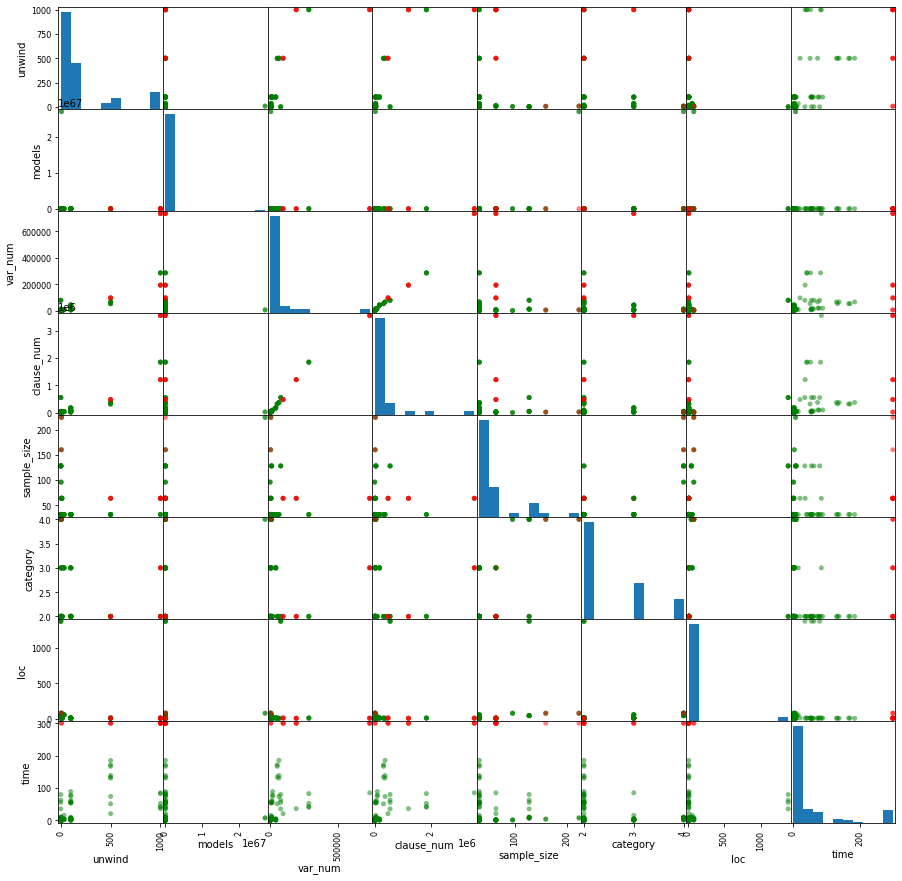

In [273]:
cmap = {'ok': 'green', 'to': 'red', 'mo': 'orange'}
plot_data_approx = df[df.counter=="approxmc"]
approx_colors = plot_data_approx.status.apply(lambda x: cmap.get(x,"black"))
pd.plotting.scatter_matrix(plot_data_approx, figsize=(15, 15),s=100,c=approx_colors)

array([[<AxesSubplot:xlabel='unwind', ylabel='unwind'>,
        <AxesSubplot:xlabel='models', ylabel='unwind'>,
        <AxesSubplot:xlabel='var_num', ylabel='unwind'>,
        <AxesSubplot:xlabel='clause_num', ylabel='unwind'>,
        <AxesSubplot:xlabel='sample_size', ylabel='unwind'>,
        <AxesSubplot:xlabel='category', ylabel='unwind'>,
        <AxesSubplot:xlabel='loc', ylabel='unwind'>,
        <AxesSubplot:xlabel='time', ylabel='unwind'>],
       [<AxesSubplot:xlabel='unwind', ylabel='models'>,
        <AxesSubplot:xlabel='models', ylabel='models'>,
        <AxesSubplot:xlabel='var_num', ylabel='models'>,
        <AxesSubplot:xlabel='clause_num', ylabel='models'>,
        <AxesSubplot:xlabel='sample_size', ylabel='models'>,
        <AxesSubplot:xlabel='category', ylabel='models'>,
        <AxesSubplot:xlabel='loc', ylabel='models'>,
        <AxesSubplot:xlabel='time', ylabel='models'>],
       [<AxesSubplot:xlabel='unwind', ylabel='var_num'>,
        <AxesSubplot:xlabel='mo

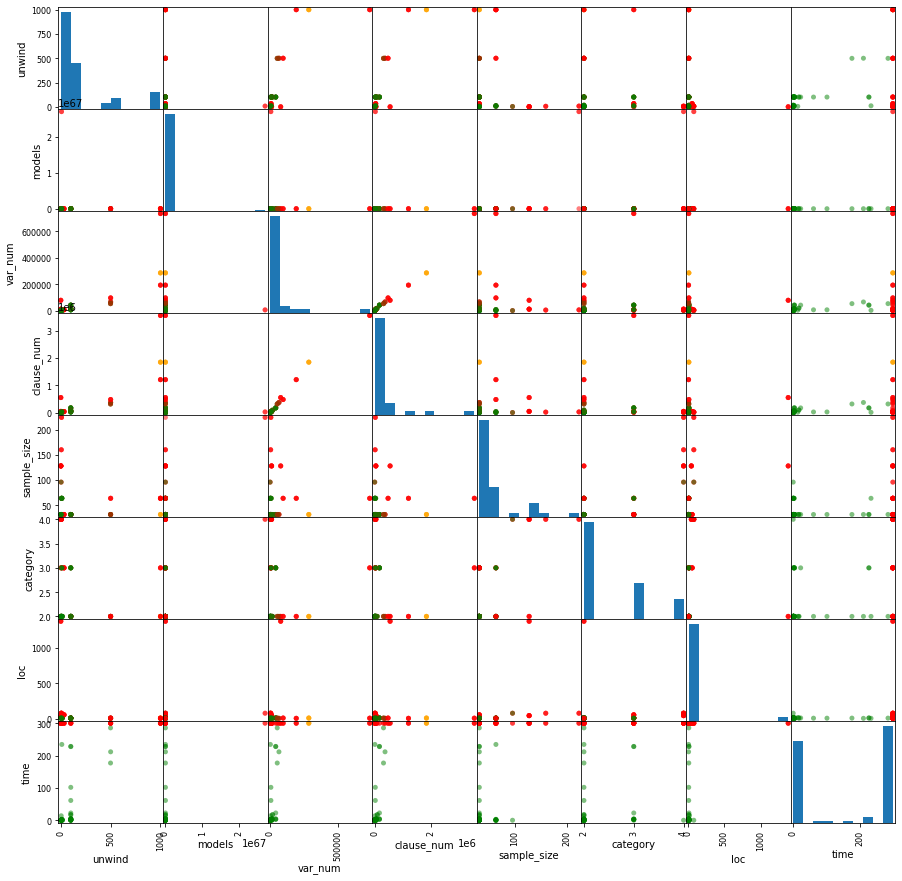

In [274]:
cmap = {'ok': 'green', 'to': 'red', 'mo': 'orange'}
plot_data_ganak = df[df.counter=="ganak"]
ganak_colors = plot_data_ganak.status.apply(lambda x: cmap.get(x,"black"))
pd.plotting.scatter_matrix(plot_data_ganak, figsize=(15, 15),s=100,c=ganak_colors)

In [275]:
print(" Ganak / ApproxMC")
dfgan = df[df.counter=="ganak"]
dfapp = df[df.counter=="approxmc"]
print("Total: ",len(dfgan),"/",len(dfapp))
print("Unsolved: ",len(dfgan[dfgan.status!="ok"]),"/",len(dfapp[dfapp.status!="ok"]))

 Ganak / ApproxMC
Total:  123 / 123
Unsolved:  62 / 11


In [276]:
df["ratio"] = df.clause_num / (df.var_num)
df["modelshare"] = df.models / np.float64(2)**(df.sample_size)

In [277]:
plot_data_approx["ratio"] = plot_data_approx.clause_num / (plot_data_approx.var_num)
plot_data_approx["modelshare"] = plot_data_approx.models / np.float64(2)**(plot_data_approx.sample_size)

<ipython-input-277-f8ca2db46dc5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data_approx["ratio"] = plot_data_approx.clause_num / (plot_data_approx.var_num)
<ipython-input-277-f8ca2db46dc5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data_approx["modelshare"] = plot_data_approx.models / np.float64(2)**(plot_data_approx.sample_size)


In [278]:
plot_data_ganak["ratio"] = plot_data_ganak.clause_num / (plot_data_ganak.var_num)
plot_data_ganak["modelshare"] = plot_data_ganak.models / np.float64(2)**(plot_data_ganak.sample_size)

<ipython-input-278-28956be4c837>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data_ganak["ratio"] = plot_data_ganak.clause_num / (plot_data_ganak.var_num)
<ipython-input-278-28956be4c837>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data_ganak["modelshare"] = plot_data_ganak.models / np.float64(2)**(plot_data_ganak.sample_size)


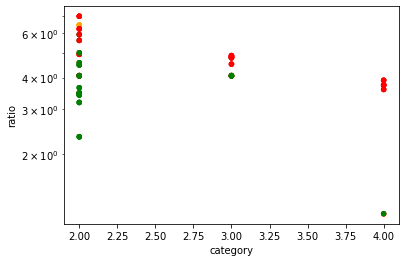

In [279]:
#ax = plot_data_ganak.plot(x="clause_num",y="var_num",kind='scatter',c=ganak_colors,logx=True,logy=True)
ax = plot_data_ganak.plot(x="category",y="ratio",kind='scatter',c=ganak_colors,logy=True)

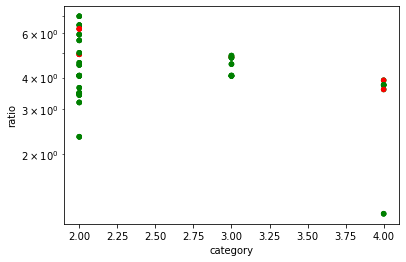

In [280]:
#ax = plot_data_ganak.plot(x="clause_num",y="var_num",kind='scatter',c=ganak_colors,logx=True,logy=True)
ax = plot_data_approx.plot(x="category",y="ratio",kind='scatter',c=approx_colors,logy=True)

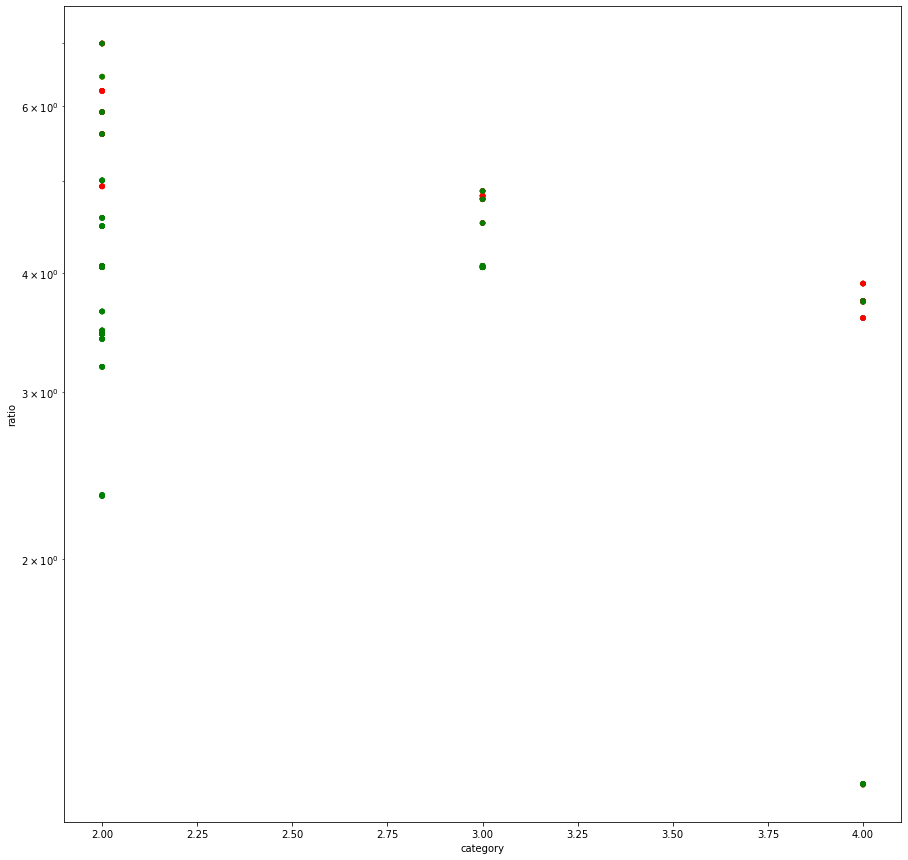

In [281]:
#ax = plot_data_ganak.plot(x="clause_num",y="var_num",kind='scatter',c=ganak_colors,logx=True,logy=True)
ax = df.plot(x="category",y="ratio",kind='scatter',c=df_colors,logy=True,figsize=(15,15))

In [286]:
for c in [2,3,4]:
    share = len(plot_data_ganak[plot_data_ganak.category==c][plot_data_ganak.status=="ok"])/len(plot_data_ganak[plot_data_ganak.category==c])
    print("Category ",c,end=" | ")
    print(len(plot_data_ganak[plot_data_ganak.category==c]),end=" | ")
    print(share, end=" | ")
    print(plot_data_ganak[plot_data_ganak.category==c][plot_data_ganak.status!="ok"]["models"].min(),end=" | ")
    print(plot_data_ganak[plot_data_ganak.category==c][plot_data_ganak.status!="ok"]["models"].median(),end=" | ")
    print(plot_data_ganak[plot_data_ganak.category==c][plot_data_ganak.status!="ok"]["models"].max(),end=" | ")
    print(plot_data_ganak[plot_data_ganak.category==c][plot_data_ganak.status!="ok"]["unwind"].min(),end=" | ")
    print(plot_data_ganak[plot_data_ganak.category==c][plot_data_ganak.status!="ok"]["unwind"].median(),end=" | ")
    print(plot_data_ganak[plot_data_ganak.category==c][plot_data_ganak.status!="ok"]["unwind"].max(),end=" | ")
    print("")

Category  2 | 78 | 0.6410256410256411 | -1.0 | 4294967296.0 | 3.402823669209385e+38 | 1 | 501.0 | 1001 | 
Category  3 | 29 | 0.3448275862068966 | -1.0 | 2147483648.0 | 1.8446744073709552e+19 | 1 | 33.0 | 1001 | 
Category  4 | 16 | 0.0625 | -1.0 | 1.7014118346046923e+38 | 2.695994666715064e+67 | 2 | 4.0 | 8 | 


<ipython-input-286-7862c2e7b996>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  share = len(plot_data_ganak[plot_data_ganak.category==c][plot_data_ganak.status=="ok"])/len(plot_data_ganak[plot_data_ganak.category==c])
<ipython-input-286-7862c2e7b996>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(plot_data_ganak[plot_data_ganak.category==c][plot_data_ganak.status!="ok"]["models"].min(),end=" | ")
<ipython-input-286-7862c2e7b996>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(plot_data_ganak[plot_data_ganak.category==c][plot_data_ganak.status!="ok"]["models"].median(),end=" | ")
<ipython-input-286-7862c2e7b996>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(plot_data_ganak[plot_data_ganak.category==c][plot_data_ganak.status!="ok"]["models"].max(),end=" | ")
<ipython-input-286-7862c2e7b996>:9: UserWarning: Boolean Series key will be rei

In [287]:
for c in [2,3,4]:
    share = len(plot_data_approx[plot_data_approx.category==c][plot_data_approx.status=="ok"])/len(plot_data_approx[plot_data_approx.category==c])
    print("Category ",c," (",len(plot_data_approx[plot_data_approx.category==c]),"): ",share)

Category  2  ( 78 ):  0.9230769230769231
Category  3  ( 29 ):  0.896551724137931
Category  4  ( 16 ):  0.875


<ipython-input-287-4fe65659358d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  share = len(plot_data_approx[plot_data_approx.category==c][plot_data_approx.status=="ok"])/len(plot_data_approx[plot_data_approx.category==c])
<ipython-input-287-4fe65659358d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  share = len(plot_data_approx[plot_data_approx.category==c][plot_data_approx.status=="ok"])/len(plot_data_approx[plot_data_approx.category==c])
<ipython-input-287-4fe65659358d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  share = len(plot_data_approx[plot_data_approx.category==c][plot_data_approx.status=="ok"])/len(plot_data_approx[plot_data_approx.category==c])


In [193]:
plot_data_ganak[plot_data_ganak.category==2][plot_data_ganak.status!="ok"]

<ipython-input-193-c60341dd1bc0>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_data_ganak[plot_data_ganak.category==2][plot_data_ganak.status!="ok"]


,benchmark,run,counter,unwind,models,var_num,clause_num,sample_size,category,loc,status,time
8,for_bounded_loop1-2.c,AMM,ganak,1001,4.294967e+09,286276,1845066,32,2,12,mo,300.0
10,for_bounded_loop1-2.c,AMH,ganak,1001,1.024000e+03,286276,1845066,32,2,12,mo,300.0
12,for_bounded_loop1-2.c,ASM,ganak,1001,1.008000e+03,286278,1845072,32,2,12,mo,300.0
14,for_bounded_loop1-2.c,ASH,ganak,1001,1.024000e+03,286278,1845072,32,2,12,mo,300.0
86,hhk2008.c,AMM,ganak,6,1.844674e+19,1548,5392,64,2,12,to,300.0
116,example1a-2.c,AMM,ganak,102,4.294967e+09,13496,54961,32,2,8,to,300.0
122,Waldkirch-2.c,AMM,ganak,501,4.294967e+09,65836,369186,32,2,8,to,300.0
124,Waldkirch-2.c,AMH,ganak,501,9.920000e+02,65836,369186,32,2,8,to,300.0
128,Waldkirch-2.c,ASH,ganak,501,5.040000e+02,65838,369192,32,2,8,to,300.0
152,count_up_down_true-unreach-call_true-terminati...,AMM,ganak,500,4.294967e+09,53202,314669,32,2,11,to,300.0


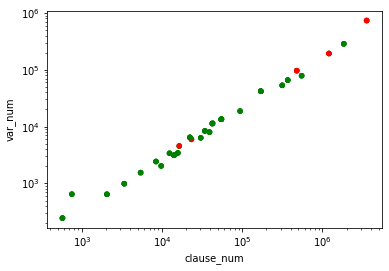

In [160]:
ax = plot_data_approx.plot(x="clause_num",y="var_num",kind='scatter',c=approx_colors,logx=True,logy=True)

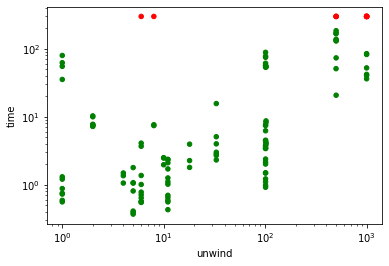

In [163]:
ax = plot_data_approx.plot(x="unwind",y="time",kind='scatter',c=approx_colors,logx=True,logy=True)

In [121]:
len(plot_data_ganak[plot_data_ganak.status!="ok"])

62

In [134]:
df[df.status=="ok"][df.var_num>100000]

<ipython-input-134-27518e0815f7>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.status=="ok"][df.var_num>100000]


,benchmark,run,counter,unwind,models,var_num,clause_num,sample_size,status,time
9,for_bounded_loop1-2.c,AMM,approxmc,1001,4.294967e+09,286276,1845066,32,ok,42.12
11,for_bounded_loop1-2.c,AMH,approxmc,1001,1.024000e+03,286276,1845066,32,ok,40.83
13,for_bounded_loop1-2.c,ASM,approxmc,1001,1.008000e+03,286278,1845072,32,ok,52.48
15,for_bounded_loop1-2.c,ASH,approxmc,1001,1.024000e+03,286278,1845072,32,ok,82.64
139,example7b-2.c,AMM,approxmc,1001,1.844674e+19,736039,3553139,64,ok,85.04
239,example7a-2.c,AMM,approxmc,1001,1.844674e+19,193498,1204796,64,ok,36.27


In [148]:
df[df.var_num==736041]

,benchmark,run,counter,unwind,models,var_num,clause_num,sample_size,status,time
142,example7b-2.c,ASM,ganak,1001,-1.0,736041,3553145,64,to,300.0
143,example7b-2.c,ASM,approxmc,1001,-1.0,736041,3553145,64,to,300.0
144,example7b-2.c,ASH,ganak,1001,-1.0,736041,3553145,64,to,300.0
145,example7b-2.c,ASH,approxmc,1001,-1.0,736041,3553145,64,to,300.0


In [183]:
df[df.category==0]

,benchmark,run,counter,unwind,models,var_num,clause_num,sample_size,category,loc,status,time
78,Problem10_16.c,AMM,ganak,1,3.402824e+38,78641,549297,128,0,1378,to,300.00
79,Problem10_16.c,AMM,approxmc,1,3.402824e+38,78641,549297,128,0,1378,ok,35.47
80,Problem10_16.c,AMH,ganak,1,1.567663e+11,78641,549297,128,0,1378,to,300.00
81,Problem10_16.c,AMH,approxmc,1,1.567663e+11,78641,549297,128,0,1378,ok,55.36
82,Problem10_16.c,ASM,ganak,1,1.481764e+11,78673,549408,128,0,1378,to,300.00
83,Problem10_16.c,ASM,approxmc,1,1.481764e+11,78673,549408,128,0,1378,ok,62.50
84,Problem10_16.c,ASH,ganak,1,1.073742e+10,78673,549408,128,0,1378,to,300.00
85,Problem10_16.c,ASH,approxmc,1,1.073742e+10,78673,549408,128,0,1378,ok,79.94


In [222]:
X = plot_data_ganak[["unwind","ratio","sample_size","category","loc"]]
y = plot_data_ganak[["time"]]

regressor = LinearRegression()
regressor.fit(X, y)

print("Coefficients: \n", regressor.coef_)

print("Score: ",regressor.score(X, y))

Coefficients: 
 [[  0.11866672  58.56795097   0.18931046 108.71051322   0.19394711]]
Score:  0.5715640225128953


In [223]:
X = plot_data_approx[["unwind","ratio","sample_size","category","loc"]]
y = plot_data_approx[["time"]]

regressor = LinearRegression()
regressor.fit(X, y)

print("Coefficients: \n", regressor.coef_)

print("Score: ",regressor.score(X, y))

Coefficients: 
 [[  0.17871627   5.32054275   0.78452179 -18.91931204  -0.05592728]]
Score:  0.5123864909903895


In [226]:
X = df[["unwind","ratio","sample_size","category","loc"]]
y = df[["time"]]

regressor = LinearRegression()
regressor.fit(X, y)

print("Coefficients: \n", regressor.coef_)

print("Score: ",regressor.score(X, y))

Coefficients: 
 [[ 0.14869149 31.94424686  0.48691612 44.89560059  0.06900992]]
Score:  0.3445588622215344
